# **1. Perkenalan Dataset**


Pada proyek eksperimen ini, saya menggunakan dataset **Boston Housing**. Dataset ini merupakan salah satu dataset standar yang populer digunakan untuk studi kasus **Regresi** dalam Machine Learning.

Berikut adalah detail mengenai dataset yang digunakan:

1.  **Nama Dataset**: Boston Housing Data
2.  **Sumber Dataset**: Kaggle (Altavish)
    * *Tautan*: [Boston Housing Dataset - Kaggle](https://www.kaggle.com/datasets/altavish/boston-housing-dataset)
3.  **Deskripsi Masalah**:
    Tujuan dari eksperimen ini adalah memprediksi nilai rata-rata rumah (**MEDV** - *Median value of owner-occupied homes*) di berbagai area di Boston berdasarkan 13 fitur karakteristik lingkungan, seperti tingkat kejahatan (`CRIM`), pajak properti (`TAX`), jumlah kamar (`RM`), dan lain-lain.
4.  **Karakteristik Data**:
    * **Jumlah Sampel**: 506 baris
    * **Jumlah Fitur**: 13 Fitur Input + 1 Target Variable (`MEDV`)
    * **Tipe Masalah**: Supervised Learning - Regression

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
# 2. Import Library

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

sns.set(style="whitegrid", context="notebook")

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
# 3. Memuat Dataset


data_path = "/kaggle/input/boston-housing-dataset/HousingData.csv"
df = pd.read_csv(data_path)

print("5 baris pertama dataset:")
display(df.head())

print("\nInfo dataset:")
print(df.info())

print("\nStatistik deskriptif:")
display(df.describe())

5 baris pertama dataset:


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2



Info dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB
None

Statistik deskriptif:


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [3]:
# 4.1 Cek missing value

print("Jumlah missing values per kolom:")
missing_counts = df.isna().sum()
print(missing_counts)

Jumlah missing values per kolom:
CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64


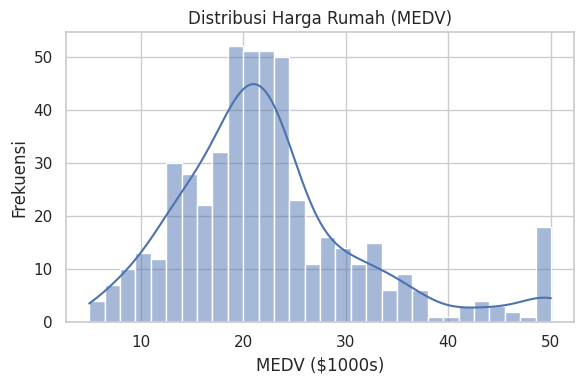

In [4]:
# 4.2 Distribusi variabel target (MEDV)

plt.figure(figsize=(6, 4))
sns.histplot(df["MEDV"], bins=30, kde=True)
plt.title("Distribusi Harga Rumah (MEDV)")
plt.xlabel("MEDV ($1000s)")
plt.ylabel("Frekuensi")
plt.tight_layout()
plt.show()

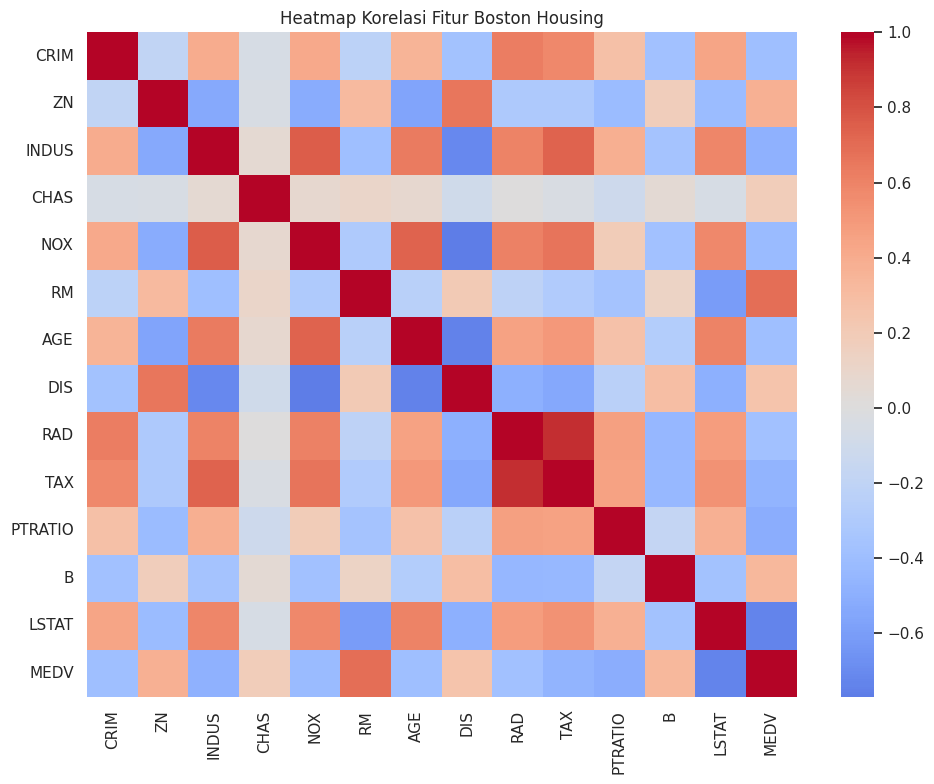

Korelasi fitur terhadap MEDV:
MEDV       1.000000
RM         0.695360
ZN         0.373136
B          0.333461
DIS        0.249929
CHAS       0.181391
RAD       -0.381626
CRIM      -0.391363
AGE       -0.394656
NOX       -0.427321
TAX       -0.468536
INDUS     -0.481772
PTRATIO   -0.507787
LSTAT     -0.735822
Name: MEDV, dtype: float64


In [5]:
# 4.3 Korelasi antar fitur dan dengan target

plt.figure(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Heatmap Korelasi Fitur Boston Housing")
plt.tight_layout()
plt.show()

# (opsional) Lihat korelasi setiap fitur dengan MEDV secara terurut
corr_target = corr["MEDV"].sort_values(ascending=False)
print("Korelasi fitur terhadap MEDV:")
print(corr_target)

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [6]:
# 5.1 Menangani missing value dengan median

df_clean = df.fillna(df.median(numeric_only=True))

print("Missing values setelah preprocessing:")
print(df_clean.isna().sum())

Missing values setelah preprocessing:
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


In [7]:
# 5.2 Menyimpan dataset yang sudah dipreprocessing

import os

output_dir = "namadataset_preprocessing"
os.makedirs(output_dir, exist_ok=True)

output_path = os.path.join(output_dir, "HousingData_clean.csv")
df_clean.to_csv(output_path, index=False)

print(f"Dataset bersih berhasil disimpan di: {output_path}")
print("Shape dataset bersih:", df_clean.shape)

Dataset bersih berhasil disimpan di: namadataset_preprocessing/HousingData_clean.csv
Shape dataset bersih: (506, 14)
